# Bike sharing Assignment
## Problem Statement
BoomBikes, a US bike-sharing service, has faced significant revenue declines due to the COVID-19 pandemic. To recover post-lockdown and improve their business, the company seeks to understand the factors driving the demand for shared bikes. They aim to predict future demand and adapt to the changing needs of users to stand out from competitors and generate profits. The company has collected data on daily bike demand, influenced by various factors such as weather and user behavior, and has enlisted a consulting firm to **identify which variables significantly impact bike demand and how well these factors explain it.**

## STEP 1: Data Loading and Understanding

In [351]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [610]:
# Import are the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [353]:
bike = pd.read_csv("C:/Users/jekka/OneDrive/Desktop/Machine learning and AI/Database/day.csv")

In [354]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe

In [356]:
bike.shape

(730, 16)

In [357]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [358]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## STEP 2: Pre-Processing Steps
- 'casual', 'registered' columns must be deleted as they are not features


In [360]:
bike.drop(columns=['casual', 'registered'], inplace=True)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


-  Handle Categorical Columns
   1. season : season (1:spring, 2:summer, 3:fall, 4:winter)
   2. yr : year (0: 2018, 1:2019)
   3. weathersit :
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        -  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + 
   4. weekday - {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}Fog

In [362]:
# 1. season
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [363]:
# 2. yr
bike['yr'] = bike['yr'].map({0: 2018, 1: 2019})

In [364]:
# 3. weathersit
bike['weathersit'] = bike['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light rain', 4: 'heavy rain'})

In [365]:
# 4. weekday
bike['weekday'] = bike['weekday'].map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

In [366]:
# 4. mnth
bike['mnth'] = bike['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [367]:
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,2018,Jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,2018,Jan,0,Tues,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,2018,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,2018,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,2018,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## STEP 3: EDA

Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

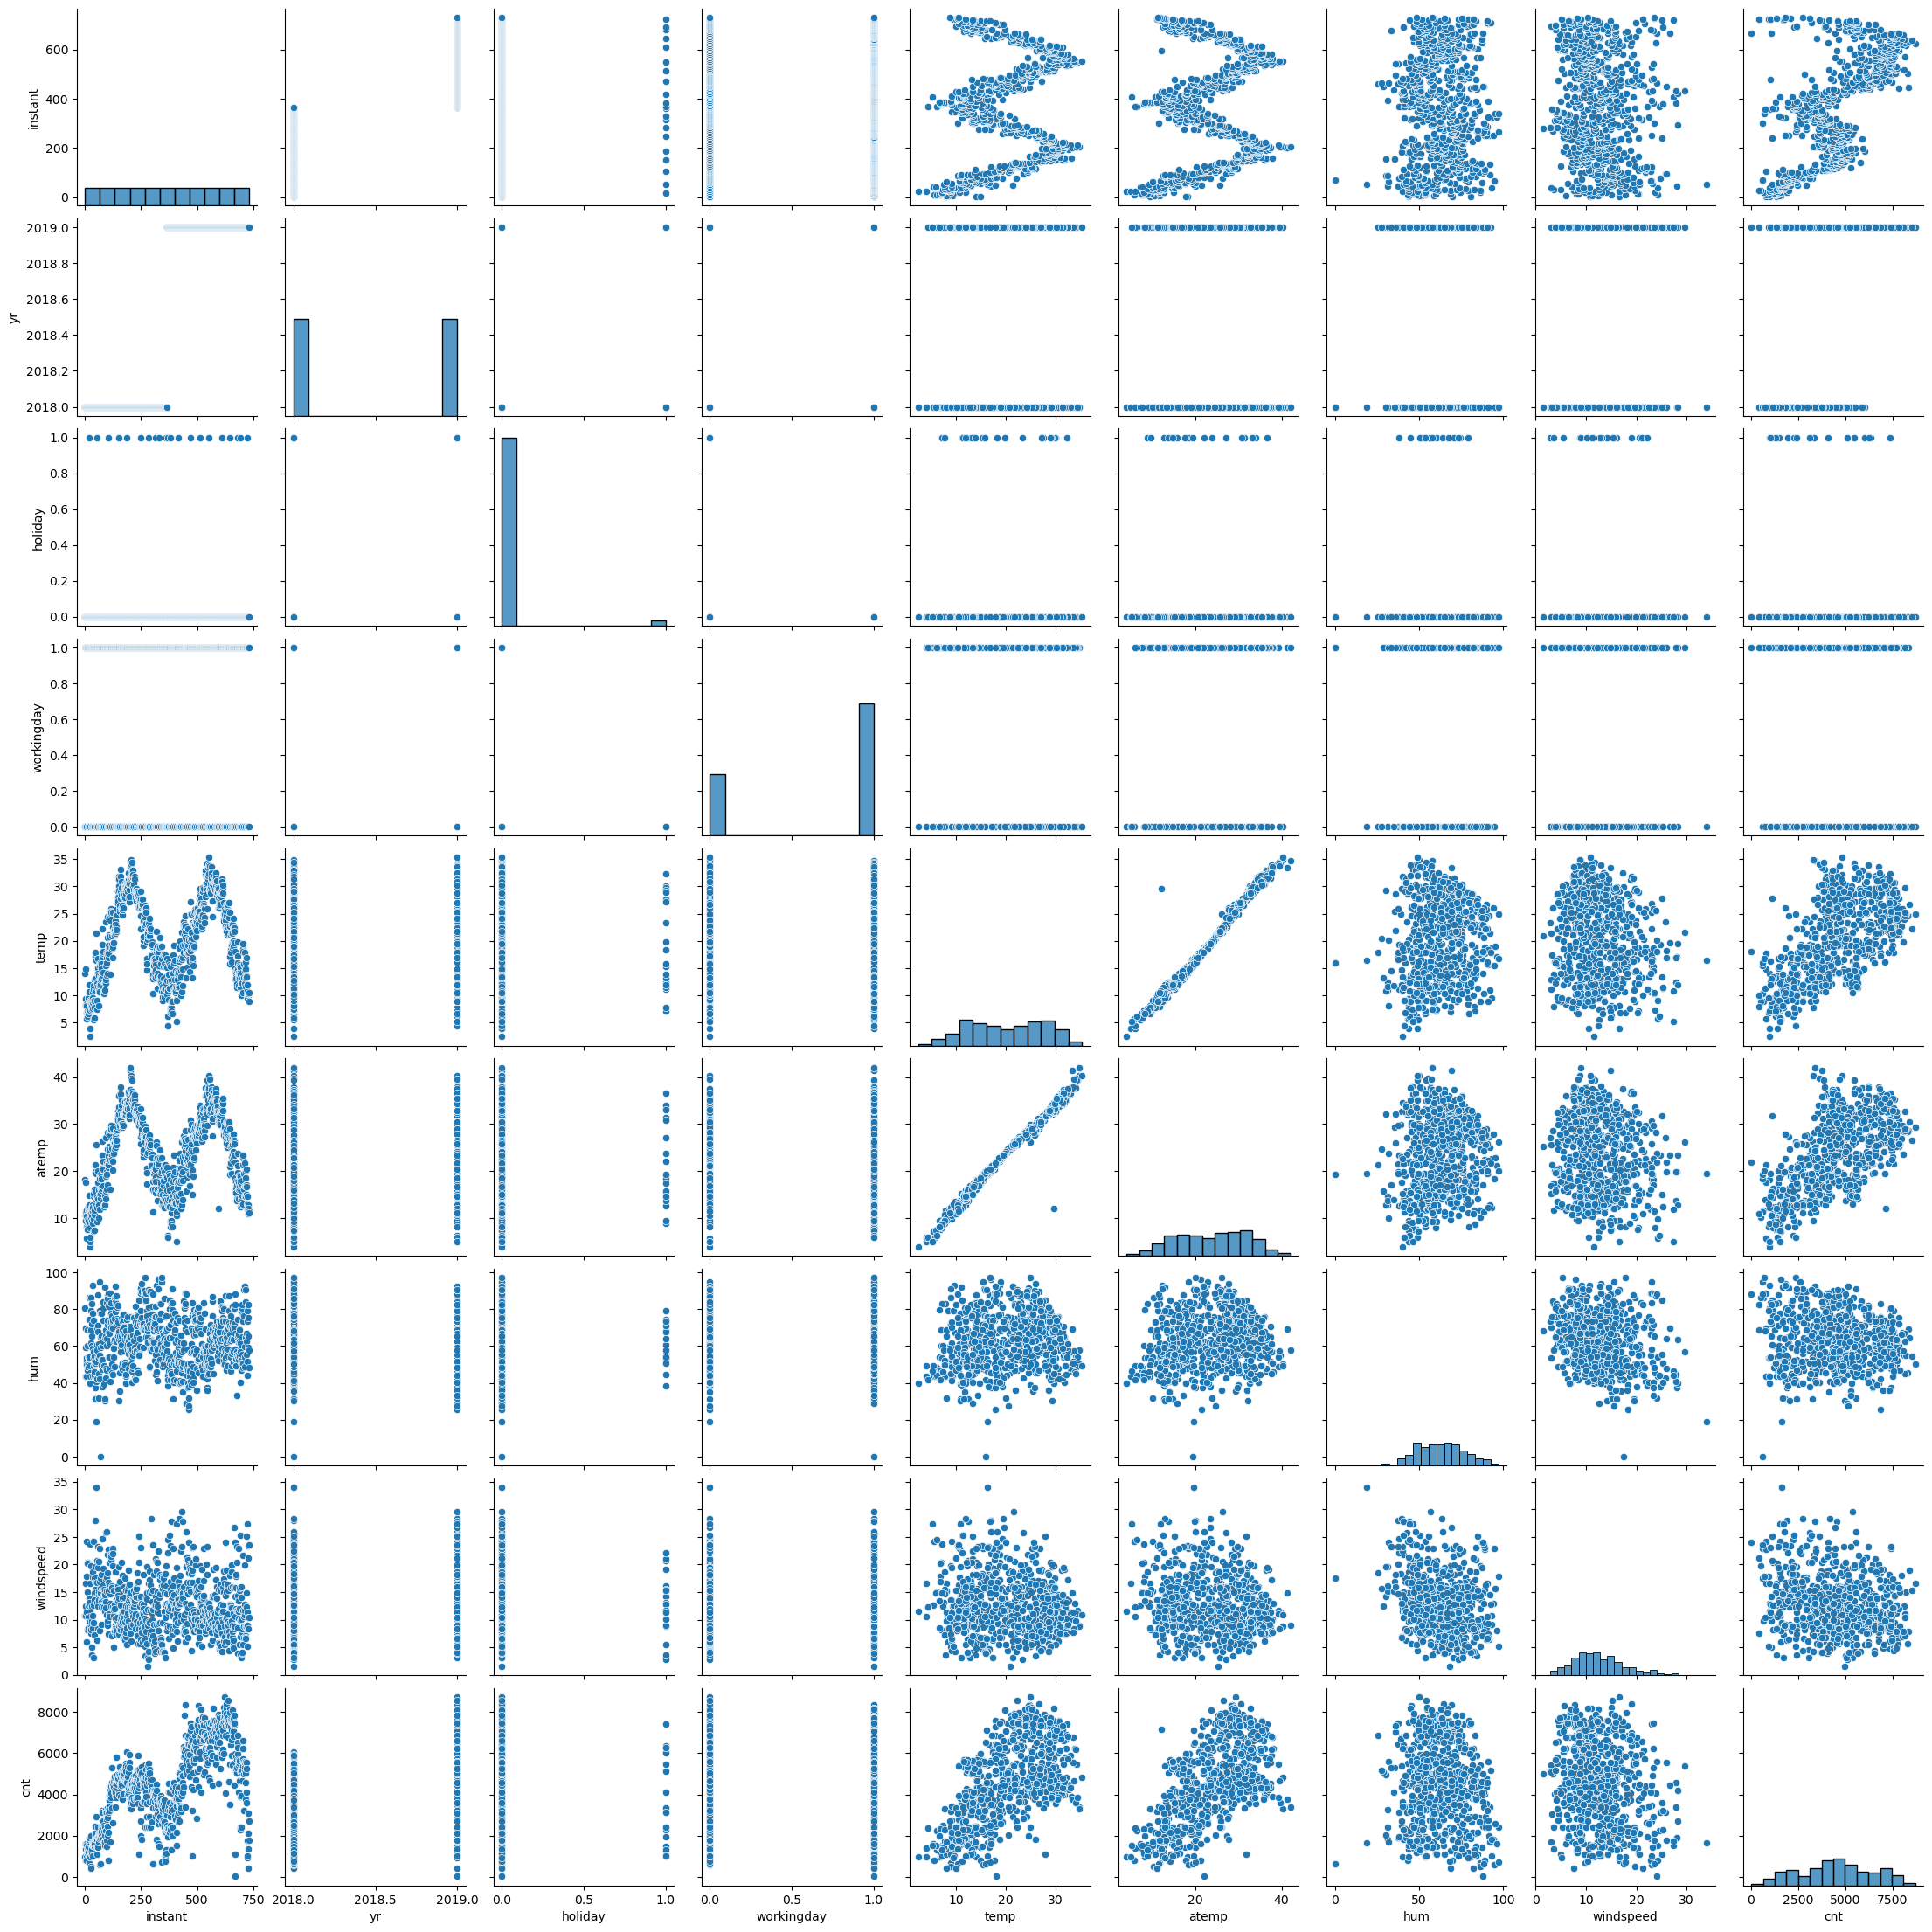

In [371]:
sns.pairplot(bike)
plt.show()

### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

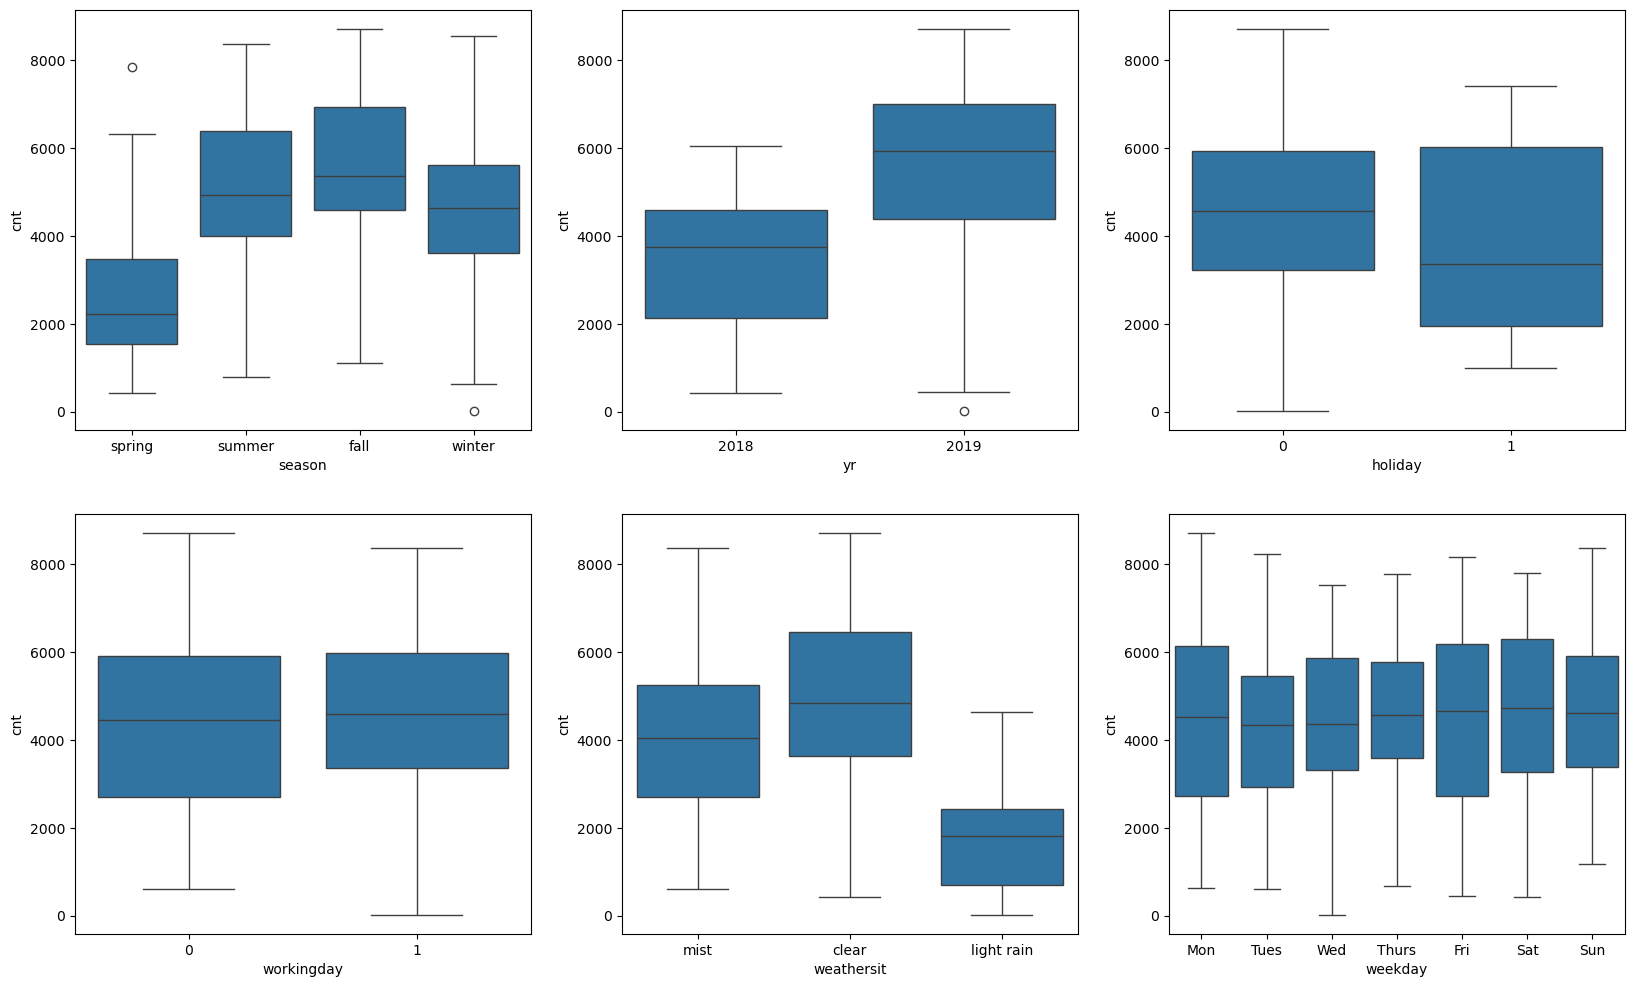

In [373]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

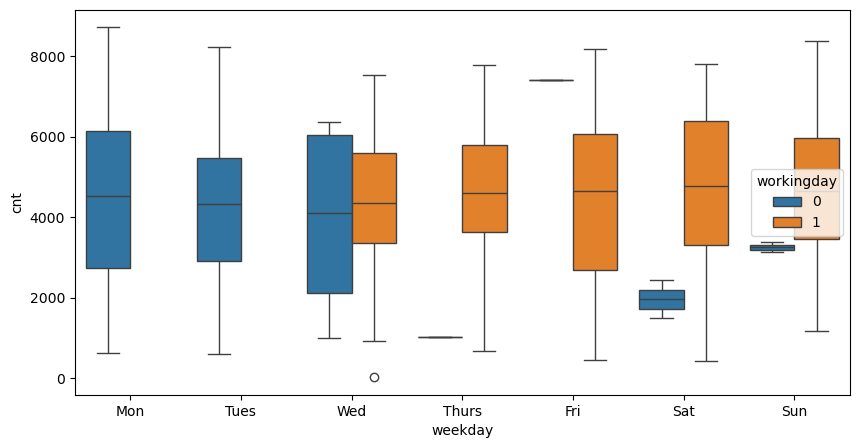

In [374]:
# We'll do bivariate analysis between the categorical variables weekday and workingday

plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'workingday', data = bike)
plt.show()

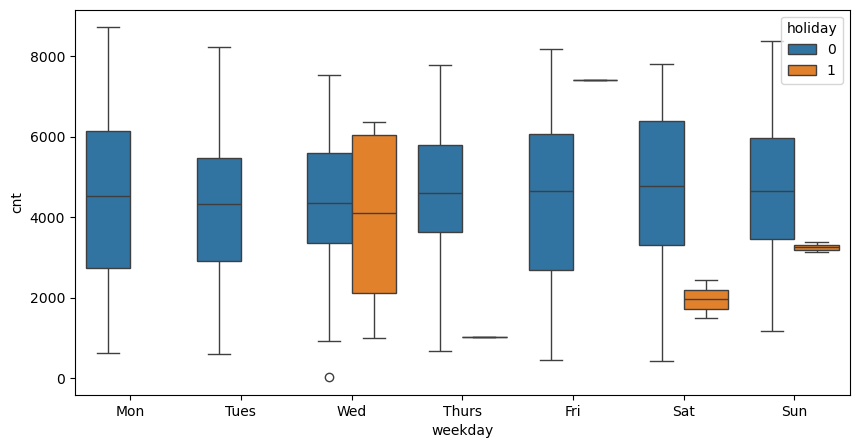

In [375]:
# We'll do bivariate analysis between the categorical variables weekday and holiday

plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'holiday', data = bike)
plt.show()

Clearly from the analysis we find some features to be highly related to our target variable cnt. Features like season, temp, weathersit seem to be important predicting variables for our model. 

Let us now also plot correlation matrix to understand these relationships further

<Axes: >

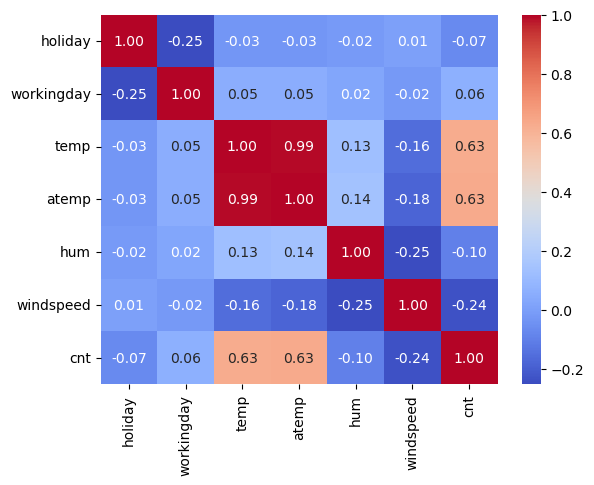

In [377]:
bike_c = bike.drop(columns=['dteday','instant', 'season', 'yr','weekday','weathersit','mnth'])
corr_matrix = bike_c.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

We can see that temp and atemp columns are highly correlated and to avoid multi-colinearity in our model we can discard one of the columns

In [379]:
bike.drop(columns=['temp'], inplace=True)


## Dummy Variables

Some of the categorical variables should be used to create dummy variables as they have strings.
- season - 4 levels
- yr - 2 levels
- mnth - 12 levels
- weekday - 7 levels
- weathersit - 4 levels
- holiday and workingday - 2 levels (No need for dummies as they are already boolean)

In [382]:
# Before we do that. Let us drop columns instant and dteday (As this data is already captured in the other features)
bike.drop(columns=['instant', 'dteday'], inplace=True)


In [383]:
# season
status = pd.get_dummies(bike['season'], drop_first = True)
# Add the results to the original housing dataframe

bike = pd.concat([bike, status], axis = 1)

In [384]:
bike.drop(columns=['season'], inplace=True)

In [385]:
# yr
status = pd.get_dummies(bike['yr'], drop_first = True)
# Add the results to the original housing dataframe

bike = pd.concat([bike, status], axis = 1)

bike.drop(columns=['yr'], inplace=True)

In [386]:
# mnth
status = pd.get_dummies(bike['mnth'], drop_first = True)
# Add the results to the original housing dataframe

bike = pd.concat([bike, status], axis = 1)

bike.drop(columns=['mnth'], inplace=True)

In [387]:
# weekday
status = pd.get_dummies(bike['weekday'], drop_first = True)
# Add the results to the original housing dataframe

bike = pd.concat([bike, status], axis = 1)

bike.drop(columns=['weekday'], inplace=True)

In [388]:
# weathersit
status = pd.get_dummies(bike['weathersit'], drop_first = True)
# Add the results to the original housing dataframe

bike = pd.concat([bike, status], axis = 1)

bike.drop(columns=['weathersit'], inplace=True)

In [389]:
bike.replace({True: 1, False: 0}, inplace=True)

In [390]:
bike.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,light rain,mist
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


All the respective dummy variables are now created and the categorical columns have been deleted.

## STEP 4: Train Test Split

We will split the data to train (70%) set and test (30%) set for our regression model.


In [393]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

## STEP 5: Missing value Imputaion

Since there are no missing values in this dataset we can proceed

## STEP 6: Rescaling the features

In [396]:
# We'll use the min max scaller
scaler = MinMaxScaler()

In [397]:
bike.describe()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,light rain,mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.683562,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.500000,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.143836,0.028767,0.336986
std,0.167266,0.465405,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.500343,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.351164,0.167266,0.473004
min,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [398]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [399]:
df_train.describe()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,light rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [400]:
df_train.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,light rain,mist
653,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
576,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
426,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
728,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


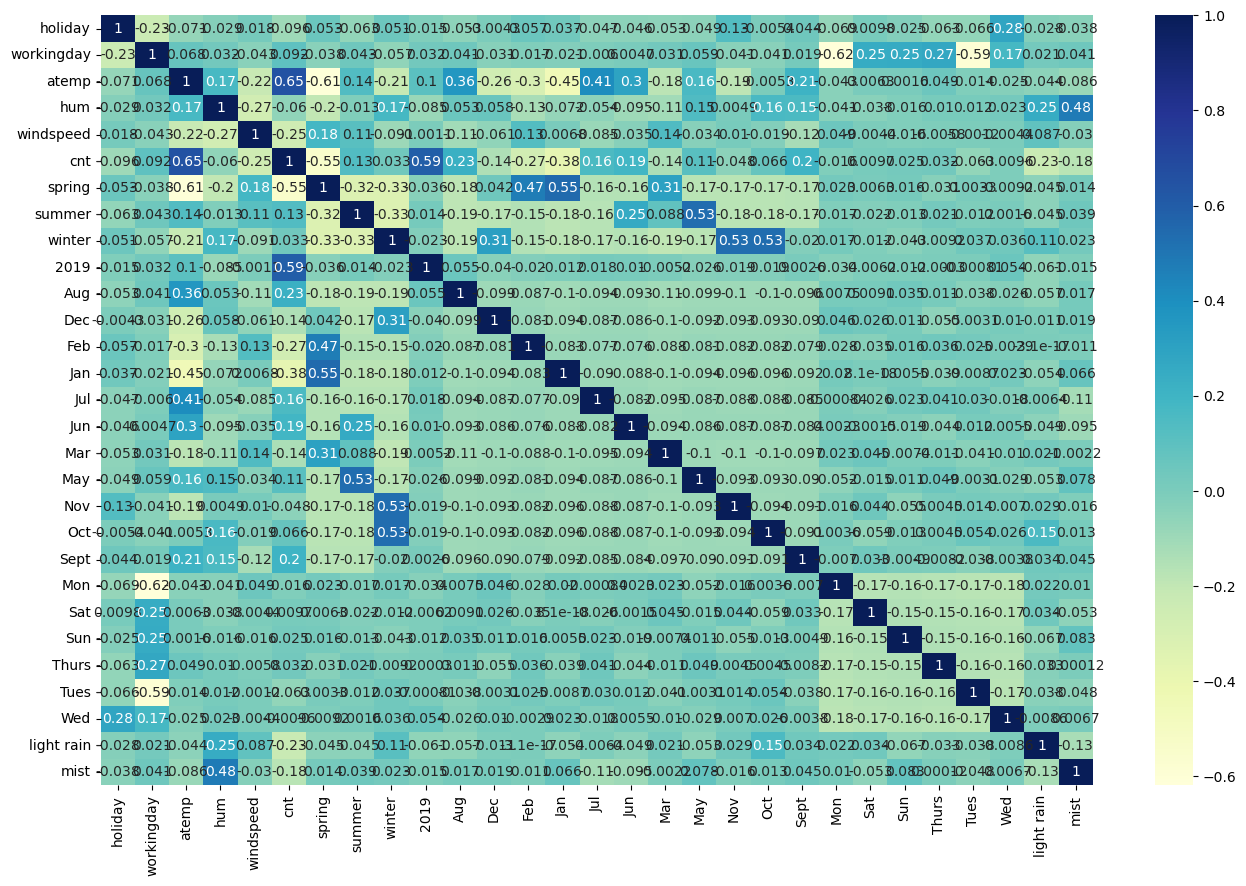

In [401]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## STEP 7: Model Building and Feature Selection

Dividing into X and Y sets for the model building

In [441]:
y_train = df_train.pop('cnt')
X_train = df_train

We will start with building a multiple linear regression model with all of the variables available to us right now. We will then proceed to using a hybrid approach for feature selection

In [443]:
#Build a linear model WITH ALL THE FEATURE VARIABLES

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.258411
holiday       0.016453
workingday    0.096271
atemp         0.419497
hum          -0.145605
windspeed    -0.168583
spring       -0.055055
summer        0.030819
winter        0.099787
2019          0.234176
Aug           0.036894
Dec          -0.054028
Feb          -0.040490
Jan          -0.073420
Jul          -0.020120
Jun           0.017822
Mar          -0.000636
May           0.035849
Nov          -0.047654
Oct           0.007796
Sept          0.091471
Mon           0.100191
Sat          -0.005089
Sun           0.008112
Thurs        -0.014044
Tues          0.045496
Wed          -0.018213
light rain   -0.254551
mist         -0.062605
dtype: float64

In [445]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          4.12e-180
Time:                        17:12:03   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2584      0.035      7.320      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [448]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [452]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,84.98
20,Mon,19.34
24,Tues,18.01
5,spring,10.74
7,winter,9.47
6,summer,8.23
17,Nov,6.77
18,Oct,6.59
9,Aug,6.24
2,atemp,5.95


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Recursive Feature Selection

We'll now use RFE to automatically eliminate some of the insignificant features.

In [462]:
X_train.columns = X_train.columns.astype(str)

In [466]:

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [468]:
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 8),
 ('Thurs', False, 11),
 ('Tues', True, 1),
 ('Wed', False, 10),
 ('light rain', True, 1),
 ('mist', True, 1)]

List of all the features selected by RFE is as follows

In [481]:
# Cols selected
col = X_train.columns[ rfe.support_]
col

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', '2019', 'Jan', 'Jul', 'Sept', 'Mon', 'Tues', 'light rain',
       'mist'],
      dtype='object')

List of all the features eliminated by RFE is as follows

In [583]:
# Cols eliminated
col_r = X_train.columns[~rfe.support_]
col_r

Index(['summer', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sat',
       'Sun', 'Thurs', 'Wed'],
      dtype='object')

Using this information we can now build our model using statsmodel for statistic data 

In [483]:
X_train_rfe = X_train[col] # Take the variables that are selected by RFE

import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_rfe).fit() # Run the Linear model

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.66e-188
Time:                        18:35:36   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2535      0.026      9.914      0.000       0.203       0.304
holiday       -0.0025      0.021     -0.117      0.907      -0.045       0.040
workingday     0.0966      0.009     10.325      0.000       0.078       0.115
atemp          0.4761      0.033     14.319      0.000       0.411       0.541
hum           -0.1449      0.038     -3.824      0.000      -0.219      -0.070
windspeed     -0.1615      0.026     -6.254      0.000      -0.212      -0.111
spring        -0.1043      0.015     -6.858      0.000      -0.134      -0.074
winter         0.0458      0.012      3.749      0.000       0.022       0.070
2019           0.2325      0.008     28.590      0.000       0.217       0.248
Jan           -0.0398      0.018     -2.264      0.024      -0.074      -0.005
Jul           -0.0699      0.017     -4.083      0.000      -0.104      -0.036
Sept           0.0626      0.015      4.045      0.000       0.032       0.093
Mon            0.1066      0.011      9.287      0.000       0.084       0.129
Tues           0.0529      0.012      4.385      0.000       0.029       0.077
light rain    -0.2484      0.027     -9.373      0.000      -0.300      -0.196
mist          -0.0594      0.011     -5.624      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       62.546   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.716
Skew:                          -0.605   Prob(JB):                     2.31e-37
Kurtosis:                       5.544   Cond. No.                     8.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Looking at the p values we can conclude that **'holiday'** is insignificant in presence of other variables. Hence can be dropped.

In [493]:
# Rebuild the model without 'holiday'
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

In [503]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_new)

lr_new = sm.OLS(y_train, X_train_new).fit() # Run the Linear model

lr_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.66e-188
Time:                        18:55:40   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.040      6.252      0.000       0.172       0.330
workingday     0.0991      0.026      3.848      0.000       0.048       0.150
atemp          0.4761      0.033     14.319      0.000       0.411       0.541
hum           -0.1449      0.038     -3.824      0.000      -0.219      -0.070
windspeed     -0.1615      0.026     -6.254      0.000      -0.212      -0.111
spring        -0.1043      0.015     -6.858      0.000      -0.134      -0.074
winter         0.0458      0.012      3.749      0.000       0.022       0.070
2019           0.2325      0.008     28.590      0.000       0.217       0.248
Jan           -0.0398      0.018     -2.264      0.024      -0.074      -0.005
Jul           -0.0699      0.017     -4.083      0.000      -0.104      -0.036
Sept           0.0626      0.015      4.045      0.000       0.032       0.093
Mon            0.1091      0.027      4.010      0.000       0.056       0.163
Tues           0.0554      0.027      2.024      0.043       0.002       0.109
light rain    -0.2484      0.027     -9.373      0.000      -0.300      -0.196
mist          -0.0594      0.011     -5.624      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       62.546   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.716
Skew:                          -0.605   Prob(JB):                     2.31e-37
Kurtosis:                       5.544   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [505]:
X_train_new = X_train_new.drop(['const'], axis = 1)

In [507]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,29.98
1,atemp,18.21
0,workingday,17.13
10,Mon,4.62
3,windspeed,4.51
11,Tues,4.49
4,spring,3.05
13,mist,2.28
5,winter,2.11
6,2019,2.08


Looking at the VIF's for this model, It is noticed that features ['hum','atemp','workingday'] have a VIF that is > 5. So there is scope of furtur refining the model.

In [510]:
# Rebuild the model without 'hum'
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [512]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_new)

lr_new = sm.OLS(y_train, X_train_new).fit() # Run the Linear model

lr_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.51e-186
Time:                        18:58:47   Log-Likelihood:                 502.89
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     496   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1745      0.035      4.946      0.000       0.105       0.244
workingday     0.0999      0.026      3.826      0.000       0.049       0.151
atemp          0.4443      0.033     13.615      0.000       0.380       0.508
windspeed     -0.1358      0.025     -5.373      0.000      -0.185      -0.086
spring        -0.1071      0.015     -6.957      0.000      -0.137      -0.077
winter         0.0369      0.012      3.038      0.003       0.013       0.061
2019           0.2360      0.008     28.815      0.000       0.220       0.252
Jan           -0.0437      0.018     -2.457      0.014      -0.079      -0.009
Jul           -0.0627      0.017     -3.632      0.000      -0.097      -0.029
Sept           0.0595      0.016      3.801      0.000       0.029       0.090
Mon            0.1115      0.028      4.045      0.000       0.057       0.166
Tues           0.0533      0.028      1.924      0.055      -0.001       0.108
light rain    -0.2888      0.025    -11.722      0.000      -0.337      -0.240
mist          -0.0827      0.009     -9.456      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       65.217   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.625
Skew:                          -0.643   Prob(JB):                     1.47e-37
Kurtosis:                       5.515   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [514]:
X_train_new = X_train_new.drop(['const'], axis = 1)

In [516]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,workingday,13.71
1,atemp,12.74
2,windspeed,4.50
9,Mon,3.90
10,Tues,3.66
3,spring,2.81
5,2019,2.07
4,winter,1.75
6,Jan,1.65
12,mist,1.58


We'll now drop 'workingday' as vif is >> 5

In [520]:
# Rebuild the model without 'workingday'
X_train_new = X_train_new.drop(['workingday'], axis = 1)

In [522]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train_new)

lr_new = sm.OLS(y_train, X_train_new).fit() # Run the Linear model

lr_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.35e-184
Time:                        19:01:16   Log-Likelihood:                 495.47
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     497   BIC:                            -909.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2710      0.025     10.839      0.000       0.222       0.320
atemp          0.4461      0.033     13.487      0.000       0.381       0.511
windspeed     -0.1379      0.026     -5.382      0.000      -0.188      -0.088
spring        -0.1094      0.016     -7.019      0.000      -0.140      -0.079
winter         0.0340      0.012      2.761      0.006       0.010       0.058
2019           0.2365      0.008     28.487      0.000       0.220       0.253
Jan           -0.0445      0.018     -2.465      0.014      -0.080      -0.009
Jul           -0.0622      0.017     -3.555      0.000      -0.097      -0.028
Sept           0.0558      0.016      3.522      0.000       0.025       0.087
Mon            0.0155      0.012      1.339      0.181      -0.007       0.038
Tues          -0.0426      0.012     -3.562      0.000      -0.066      -0.019
light rain    -0.2842      0.025    -11.396      0.000      -0.333      -0.235
mist          -0.0808      0.009     -9.131      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       80.014   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.019
Skew:                          -0.762   Prob(JB):                     3.73e-49
Kurtosis:                       5.859   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [524]:
X_train_new = X_train_new.drop(['const'], axis = 1)

In [526]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,4.66
1,windspeed,3.95
2,spring,2.25
4,2019,2.06
5,Jan,1.60
11,mist,1.53
3,winter,1.41
6,Jul,1.35
8,Mon,1.22
9,Tues,1.21


We are now left with 12 features in our model which are significant and have p values < 0.05 and VIF values < 5. Our adj R-squared value is 82.9%

## STEP 8: Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [538]:
X_train_new = sm.add_constant(X_train_new)
y_train_cnt = lr_new.predict(X_train_new)

Text(0.5, 0, 'Errors')

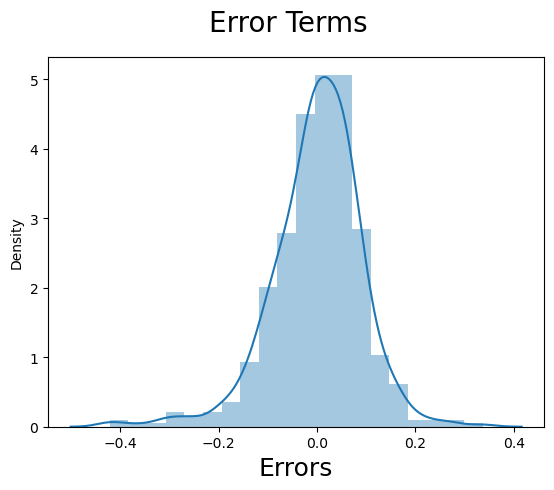

In [540]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

As it can now be verified, the error terms are indeed normally distributed.

## STEP 9: Evaluating the model on Test data

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [546]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [548]:
df_test.describe()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,light rain,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635
std,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403
min,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [551]:
y_test = df_test.pop('cnt')
X_test = df_test

In [579]:
# Adding constant variable to test dataframe
X_test_final = sm.add_constant(X_test)

In [569]:


X_test_final.columns = X_test_final.columns.astype(str)

In [587]:
# Creating X_test_final dataframe by dropping variables from X_test_final
#col_r is the list of all the variables that the RFE did not support.
X_test_final = X_test_final.drop(col_r, axis=1)

In [591]:
# These are the 3 other features that we eliminated while fine tuning our feature selection
X_test_final = X_test_final.drop(["holiday", "hum", "workingday"], axis = 1)

In [595]:
X_test_final.columns # we have X_test_final with the right attributes as required to use out model

Index([     'const',      'atemp',  'windspeed',     'spring',     'winter',
               2019,        'Jan',        'Jul',       'Sept',        'Mon',
             'Tues', 'light rain',       'mist'],
      dtype='object')

In [597]:
# Making prediction for our final model
y_pred_final = lr_new.predict(X_test_final)

### Model evaluation 
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

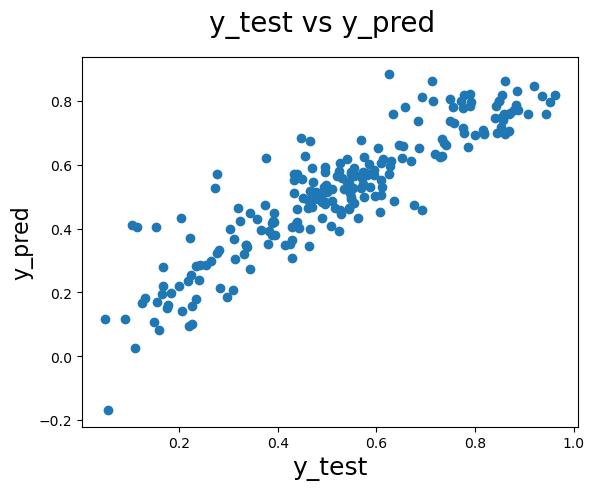

In [600]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_final)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

We can see that the equation of our best fitted line is:

$ cnt = 0.2710 + 0.4461  \times  atemp - 0.1379 \times  windspeed - 0.1094 \times spring + 0.0340	 \times winter + 0.2365 \times '2019' - 0.0445 \times Jan - 0.0622 \times Jul + 0.0558 \times Sept + 0.0155 \times Mon - 0.0426 \times Tues - 0.2842 \times light rain - 0.0808 \times mist$


In [621]:
# Calculating R-square values for test set
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_final)
r2_test

0.8068756775238132

In [619]:
# Calculating adjusted R-square values for test set
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - p - 1))
adjusted_r2_test

0.7784152510536383

## STEP 10: Conclusion

The goal of this analysis was to understand the key factors affecting the demand for shared bikes in the American market. A multiple linear regression model was developed using 12 significant features, and the final equation of the best-fitted line is as follows:

$ cnt = 0.2710 + 0.4461  \times  atemp - 0.1379 \times  windspeed - 0.1094 \times spring + 0.0340	 \times winter + 0.2365 \times '2019' - 0.0445 \times Jan - 0.0622 \times Jul + 0.0558 \times Sept + 0.0155 \times Mon - 0.0426 \times Tues - 0.2842 \times light rain - 0.0808 \times mist$

The model explains the relationship between bike demand and various meteorological and calendar variables. The coefficients of each predictor give insights into how they influence the demand for bikes:
- Positive Influences: The temperature (atemp), winter season, the year 2019, and months like September have a positive impact on bike demand.
- Negative Influences: Windspeed, spring season, and certain days or months (e.g., January, July) negatively impact demand. Additionally, weather conditions like light rain and mist also decrease demand.

#### Model Performance
###### Train Set
- R-Squared: 0.833
- Adjusted R-Squared: 0.829
The model explains 83.3% of the variance in the bike demand on the training set, indicating a good fit.

###### Test Set
- R-Squared: 0.806
- Adjusted R-Squared: 0.778
On the test set, the model explains 80.6% of the variance, with an Adjusted R-Squared of 77.8%. This demonstrates that the model generalizes well to unseen data, though there is a slight drop in performance.

#### Residual Analysis
The residuals (error terms) from the model were analyzed and found to be normally distributed. This confirms that the model meets the assumptions of linear regression, and the residuals are well-behaved without any major biases or patterns.

#### Business Insights and Recommendations
BoomBikes can leverage the insights from this model to make data-driven decisions:
- Weather Sensitivity: Since temperature has a strong positive impact and weather conditions like windspeed, mist, and light rain have negative effects on bike demand, BoomBikes can focus on promoting the service more during favorable weather and offering discounts or incentives during bad weather to mitigate loss of demand.
- Seasonal Campaigns: With spring showing a negative effect and months like July seeing lower demand, targeted marketing during these periods could help balance out seasonal variations in demand. On the other hand, higher demand months like September and winter could be utilized to maximize profits.
- Long-term Strategy: The positive influence of the year 2019 suggests a growing demand for bike-sharing, which is promising for BoomBikes' long-term growth strategy.

By understanding these key drivers, BoomBikes can align its business plan to meet post-pandemic demand more effectively, staying competitive in the market.

